# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/taxi-fsre-dataset/taxi_fare_train.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61601 entries, 0 to 61600
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                61601 non-null  object 
 1   fare_amount        61601 non-null  float64
 2   pickup_datetime    61601 non-null  object 
 3   pickup_longitude   61601 non-null  float64
 4   pickup_latitude    61601 non-null  float64
 5   dropoff_longitude  61601 non-null  float64
 6   dropoff_latitude   61601 non-null  float64
 7   passenger_count    61601 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.8+ MB


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,61601.000000,61601.000000,61601.000000,61601.000000,61601.000000,61601.000000
mean,11.336889,-72.525348,39.932442,-72.516245,39.930425,1.671450
std,9.689110,10.726166,6.213724,10.377714,6.031005,1.295731
min,-44.900000,-736.550000,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992066,40.734985,-73.991205,40.734382,1.000000
50%,8.500000,-73.981848,40.752682,-73.980096,40.753378,1.000000
75%,12.500000,-73.967258,40.767297,-73.963563,40.768187,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [5]:
d1 = df['pickup_latitude'] 
d2 = df['dropoff_latitude']
r1=d1-d2
d3= df['pickup_longitude']
d4= df['dropoff_longitude']
r2 = d3-d4
distance = np.sqrt((r1**2)+(r2**2))
distance

0        0.009436
1        0.079696
2        0.013674
3        0.025340
4        0.019470
           ...   
61596    0.016557
61597    0.045210
61598    0.004232
61599    0.025973
61600    0.015658
Length: 61601, dtype: float64

In [6]:
df.insert(7, 'Displacement',distance)
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Displacement,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.009436,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,0.079696,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,0.013674,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,0.025340,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,0.019470,1


In [7]:
df.drop(['key'] , axis=1 , inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Displacement,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.009436,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,0.079696,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,0.013674,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,0.025340,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,0.019470,1


In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek

In [9]:
df.drop(['pickup_datetime'] , axis=1 , inplace=True)

In [10]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Displacement,passenger_count,hour,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,0.009436,1,17,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,0.079696,1,16,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,0.013674,2,0,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,0.025340,1,4,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,0.019470,1,7,1


# Checking for dtypes

In [11]:
dtypes = df.dtypes
unumber = df.nunique()
pd.DataFrame({'Data Type':dtypes , '# of uniques':unumber}).T

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Displacement,passenger_count,hour,dayofweek
Data Type,float64,float64,float64,float64,float64,float64,int64,int32,int32
# of uniques,751,38726,42550,40368,43934,59806,7,24,7


# Handling missing values

In [12]:
nulls = df.isnull().sum()
pd.DataFrame({'Null Values':nulls}).T

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Displacement,passenger_count,hour,dayofweek
Null Values,0,0,0,0,0,0,0,0,0


# Handling Outliers

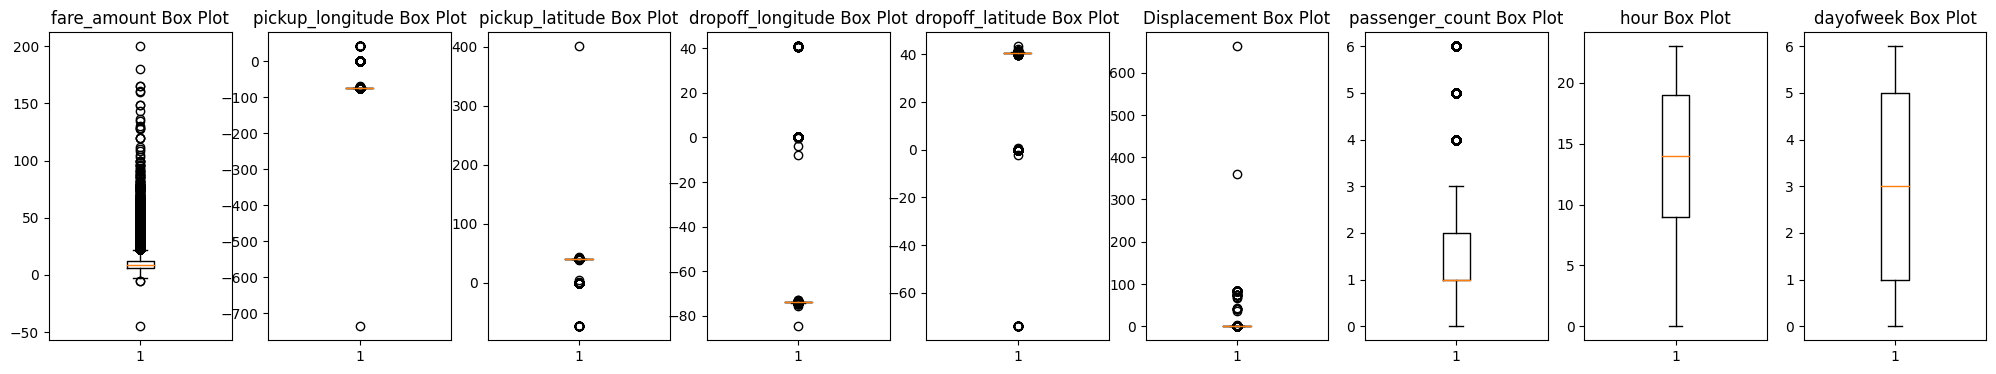

In [13]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(25,4))
for i , col in enumerate(Numeric_columns):
    plt.subplot(1,9,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show() 

In [14]:
for col in Numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fennse = Q3 + (1.5*IQR)
    lower_fennse = Q1 - (1.5*IQR)
    Low_Outlier = df[df[col] < lower_fennse][col].values
    Up_Outlier = df[df[col] > Upper_Fennse][col].values
    df[col].replace(Low_Outlier , lower_fennse , inplace=True)
    df[col].replace(Up_Outlier , Upper_Fennse , inplace=True)

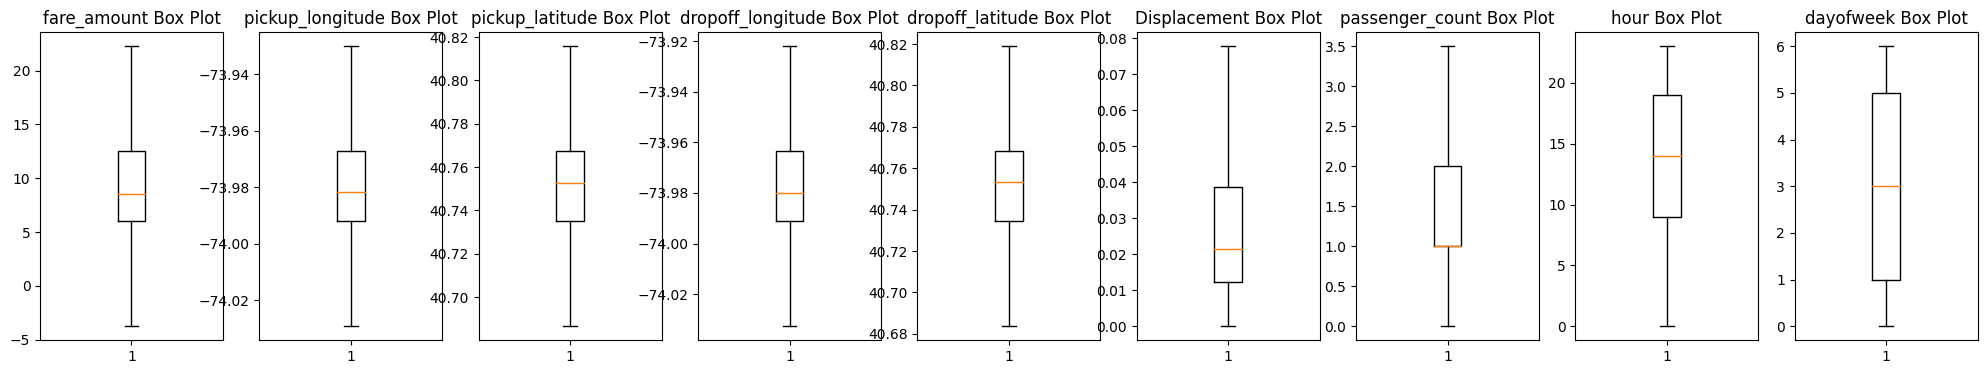

In [15]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(25,4))
for i , col in enumerate(Numeric_columns):
    plt.subplot(1,9,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show() 

# Visualizations

# Removing Dublicates

In [16]:
df.duplicated().sum()

68

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

# Data Splitting

In [19]:
x=df.drop(['fare_amount'] , axis=1)
y=df[['fare_amount']]

In [20]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Displacement,passenger_count,hour,dayofweek
0,-73.930046,40.721319,-73.922100,40.712278,0.009436,1.0,17,0
1,-74.016048,40.711303,-73.979268,40.782004,0.077811,1.0,16,1
2,-73.982738,40.761270,-73.991242,40.750562,0.013674,2.0,0,3
3,-73.987130,40.733143,-73.991567,40.758092,0.025340,1.0,4,5
4,-73.968095,40.768008,-73.956655,40.783762,0.019470,1.0,7,1


In [21]:
y.head()

,fare_amount
0,4.5
1,16.9
2,5.7
3,7.7
4,5.3


# Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler
numCol = df.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(df[numCol])
df[numCol] = scaler.transform(df[numCol])
df.head(10)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Displacement,passenger_count,hour,dayofweek
0,0.317308,1.000000,0.269265,1.000000,0.211533,0.121267,0.285714,0.739130,0.000000
1,0.794231,0.133324,0.191771,0.482961,0.727182,1.000000,0.285714,0.695652,0.166667
2,0.363462,0.469002,0.578369,0.374665,0.494657,0.175735,0.571429,0.000000,0.500000
3,0.440385,0.424742,0.360748,0.371726,0.550344,0.325669,0.285714,0.173913,0.833333
4,0.348077,0.616565,0.630501,0.687477,0.740183,0.250217,0.285714,0.304348,0.166667
5,0.609615,0.285331,0.349042,0.540627,0.551387,0.497040,0.285714,0.391304,0.500000
6,0.432692,0.496574,0.504031,0.532396,0.600263,0.187191,0.285714,0.869565,0.166667
7,0.778846,0.785815,0.677929,0.385039,0.498251,0.580209,0.285714,0.739130,0.333333
8,0.490385,0.229926,0.310999,0.358060,0.354633,0.183239,0.285714,0.565217,0.000000
9,0.486538,0.489963,0.366396,0.371970,0.550684,0.341771,0.571429,0.043478,0.333333


# Implmentation Using SVR

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

x=df.drop(['fare_amount'] , axis=1)
y=df['fare_amount']

# Data splitting into train and test
x_train , x_test , y_train , y_test = train_test_split(x[:10000],y[:10000],test_size=0.2,random_state=42)

# Create the svr model
svr = SVR(kernel='rbf', C=1000, gamma=0.1)

# Model fit and predict
svr.fit(x_train, y_train)
SVR_Predict = svr.predict(x_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(SVR_Predict)})

# Evaluation metrics
mse = mean_squared_error( y_test, SVR_Predict)
mae = mean_absolute_error( y_test, SVR_Predict)
RMSE = np.sqrt(mse)
r2 = r2_score( y_test, SVR_Predict)

# Results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", RMSE)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()


Mean Squared Error: 0.011615569774183232
Root Mean Squared Error: 0.10777555276677189
Mean Absolute Error: 0.07559030040617747
R² Score: 0.751663876306117


,Real,predicted
Real,1.000000,0.691777
predicted,0.691777,1.000000


# Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score


X = df.drop(['fare_amount'] , axis=1)
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.20, random_state=25)

# Create a Decision Tree Regressor
model = DecisionTreeRegressor() 

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
DT_pred = model.predict(X_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(DT_pred)})


# Evaluate the model
mse = mean_squared_error(y_test, DT_pred)
RMSE = np.sqrt(mse)
mae = mean_absolute_error(y_test, DT_pred)
r2 = r2_score(y_test, DT_pred)


# Results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", RMSE)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()




Mean Squared Error: 0.019743493893819856
Root Mean Squared Error: 0.14051154363190185
Mean Absolute Error: 0.09042185897435898
R² Score: 0.5558235196150622


,Real,predicted
Real,1.000000,0.622584
predicted,0.622584,1.000000


# Bagging Regressor

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score


X = df.drop(['fare_amount'] , axis=1)
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.20 , random_state=25 ) 


baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor() , n_estimators=100 , random_state=25)
baggingModel.fit(X_train , y_train)
bagging_predict = baggingModel.predict(X_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(bagging_predict)})


# Evaluate the model
mse = mean_squared_error(y_test, bagging_predict)
RMSE = np.sqrt(mse)
mae = mean_absolute_error(y_test, bagging_predict)
r2 = r2_score(y_test, bagging_predict)


# Results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", RMSE)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()




Mean Squared Error: 0.009825800145744195
Root Mean Squared Error: 0.09912517412718222
Mean Absolute Error: 0.06615145274725276
R² Score: 0.7789454415123245


,Real,predicted
Real,1.000000,0.695298
predicted,0.695298,1.000000


# Boosting Regressor

In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X = df.drop(['fare_amount'] , axis=1)
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.20 , random_state=25)


boostingModel = AdaBoostRegressor(base_estimator=DecisionTreeRegressor() , n_estimators=100 , random_state=25)
boostingModel.fit(X_train , y_train)
boosting_predict = boostingModel.predict(X_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(boosting_predict)})



# Evaluate the model
mse = mean_squared_error(y_test, boosting_predict)
RMSE = np.sqrt(mse)
mae = mean_absolute_error(y_test,boosting_predict)
r2 = r2_score(y_test, boosting_predict)


# Results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", RMSE)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()


Mean Squared Error: 0.010611396167168262
Root Mean Squared Error: 0.10301163122273262
Mean Absolute Error: 0.06840619388098713
R² Score: 0.7612716053778914


,Real,predicted
Real,1.000000,0.687404
predicted,0.687404,1.000000


# Random Forest Regressor

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score
from sklearn.ensemble import RandomForestRegressor

# Splitting data
X = df.drop(['fare_amount'] , axis=1)
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.1 , random_state=42)


R_model = RandomForestRegressor(n_estimators=100 , random_state=25)
R_model.fit(X_train , y_train )

R_predict = R_model.predict(X_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(R_predict)})


# Evaluate the model
mse = mean_squared_error(y_test,R_predict)
RMSE = np.sqrt(mse)
mae = mean_absolute_error(y_test, R_predict)
r2 = r2_score(y_test, R_predict)


# Results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", RMSE)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()


Mean Squared Error: 0.009948303862169624
Root Mean Squared Error: 0.09974118438323071
Mean Absolute Error: 0.06833329766483519
R² Score: 0.7699625360926017


,Real,predicted
Real,1.000000,0.706677
predicted,0.706677,1.000000
